In [91]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
import cv2

In [127]:
im=cv2.imread('baba.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(1536, 3264, 3)


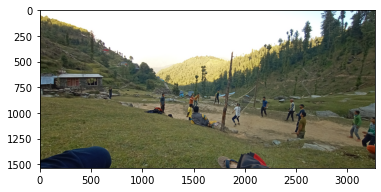

In [128]:
plt.imshow(im)
plt.show()

In [154]:
#flatten each channel of the image

all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(5013504, 3)


In [95]:
original_shape

(1536, 3264, 3)

In [137]:
import sklearn.cluster


In [138]:
from sklearn.cluster import KMeans

In [139]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [141]:
centers=km.cluster_centers_

In [142]:
centers=np.array(centers,dtype='uint8')

In [144]:
print(centers)

[[101 101  72]
 [253 254 252]
 [ 54  59  44]
 [178 171 129]]


# plote waht all colors  are these

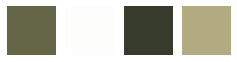

In [147]:
i=1
plt.figure(0,figsize=(4,2))

colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    
    plt.imshow(a)
plt.show() 


# Segment our orginal image

In [156]:
new_img=np.zeros((5013504,3),dtype='uint8')

print(new_img.shape)

(5013504, 3)


In [157]:
colors

[array([101, 101,  72], dtype=uint8),
 array([253, 254, 252], dtype=uint8),
 array([54, 59, 44], dtype=uint8),
 array([178, 171, 129], dtype=uint8)]

In [158]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

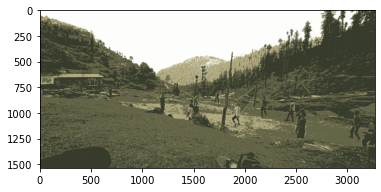

In [159]:
for ix in range(new_img.shape[0]):
     new_img[ix]=colors[km.labels_[ix]]

new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()